In [1]:
import json 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# ======================
# GLOBAL STYLE SETTINGS
# ======================
rcParams.update({
    "font.family": "Times New Roman",
    "axes.edgecolor": "0.3",
    "axes.linewidth": 1.0,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "font.size": 16,
    "figure.figsize": (8, 5),
    "legend.frameon": False,
    "axes.titleweight": "bold",
    "axes.labelweight": "medium",
    "figure.dpi": 150  # High-resolution output
})

# --- Define Colors ---
ours_abs_color = "#053253FF"   # deep blue
ours_exec_color = "#4090c5"  # light azure
baseline_color = "#8d1d1d"   # soft orange (compatible)
edge_color = "black"         # subtle border

model = "gpt-5-mini"

In [2]:
# First, just print the results side by side
import json 

with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)

results_vanilla, results_pddl = {}, {}
for element in data_vanilla:
    results_vanilla[element["dataset"]] = element["accuracy"]

for element in data_pddl:
    results_pddl[element["dataset"]] = element["accuracy"]

for dataset in results_vanilla:
    if dataset in results_pddl:
        print(f"{dataset}: Vanilla vs PDDL:\n\t{results_vanilla[dataset]}, {results_pddl[dataset]}")

calendar_scheduling: Vanilla vs PDDL:
	0.88, 0.9333333333333333
meeting_planning: Vanilla vs PDDL:
	0.24, 0.5333333333333333
trip_planning: Vanilla vs PDDL:
	0.02, 0.08
depots: Vanilla vs PDDL:
	0.9, 0.9333333333333333
logistics: Vanilla vs PDDL:
	0.9333333333333333, 0.9333333333333333
mystery_blocksworld: Vanilla vs PDDL:
	0.8666666666666667, 0.9
obfuscated_deceptive_logistics: Vanilla vs PDDL:
	0.36666666666666664, 0.9
blocksworld_easy: Vanilla vs PDDL:
	1.0, 0.9666666666666667
blocksworld_medium: Vanilla vs PDDL:
	0.9333333333333333, 0.9333333333333333
blocksworld_hard: Vanilla vs PDDL:
	0.9666666666666667, 0.9666666666666667
blocksworld_easy_optimal: Vanilla vs PDDL:
	1.0, 0.9666666666666667
blocksworld_medium_optimal: Vanilla vs PDDL:
	0.9333333333333333, 0.9333333333333333
blocksworld_hard_optimal: Vanilla vs PDDL:
	0.9, 0.9666666666666667
hanoi_easy: Vanilla vs PDDL:
	0.9666666666666667, 1.0
hanoi_medium: Vanilla vs PDDL:
	0.9, 0.9333333333333333
hanoi_hard: Vanilla vs PDDL:
	0.

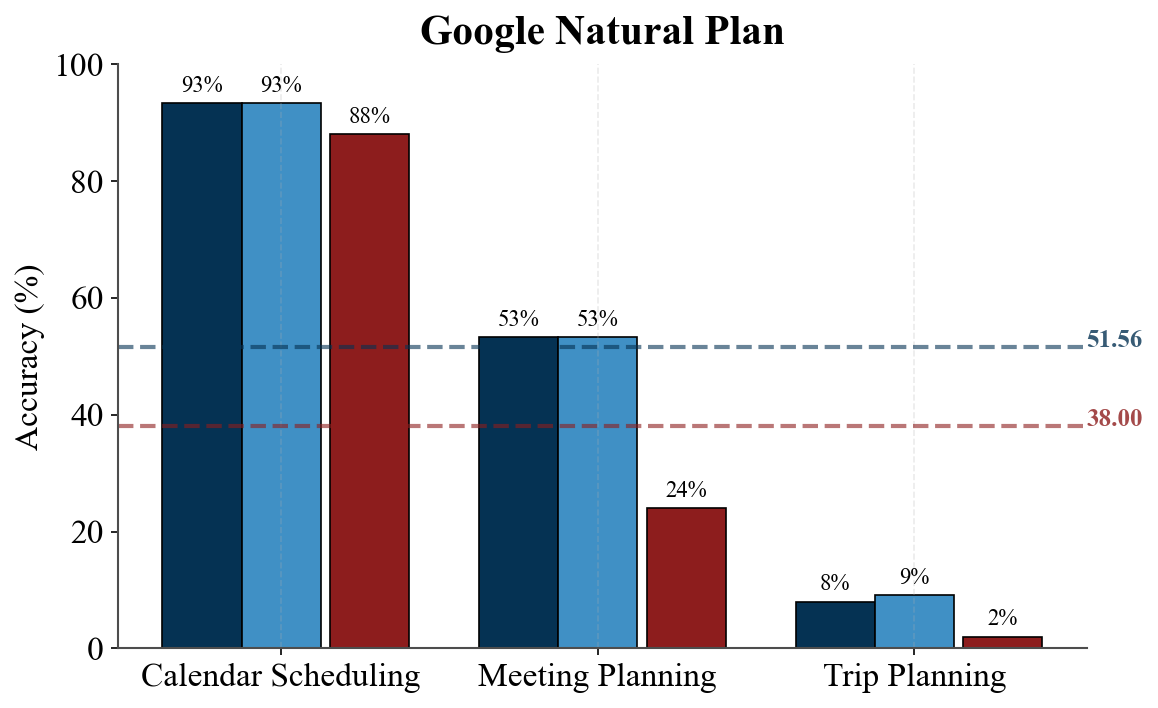

In [3]:
# ============================
# 1️⃣ Google Natural Plan Benchmark
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["calendar_scheduling", "meeting_planning", "trip_planning"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)

tasks_gnpb = ["Calendar Scheduling", "Meeting Planning", "Trip Planning"]
x = np.arange(len(tasks_gnpb))
width = 0.25

fig1, ax1 = plt.subplots()

bars1 = ax1.bar(x - width, ours_abs, width, label="Accuracy (Ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax1.bar(x, ours_exec, width, label="Verified Accuracy (Ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax1.bar(x + width + 0.03, vanilla_acc, width, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax1.set_ylabel("Accuracy (%)", fontsize=16)
ax1.set_title("Google Natural Plan", fontsize=20, pad=10)
ax1.set_xticks(x)
ax1.set_xticklabels(tasks_gnpb, rotation=0, ha="center")
# ax1.legend(fontsize=15)
ax1.grid(axis="y")
ax1.set_ylim(0, 100)

# Value labels
for container in [bars1, bars2, bars3]:
    ax1.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_abs, vanilla_acc], axis=1),
                [ours_abs_color, baseline_color]):
    ax1.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax1.text(
        x=ax1.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )

plt.tight_layout()
plt.show()

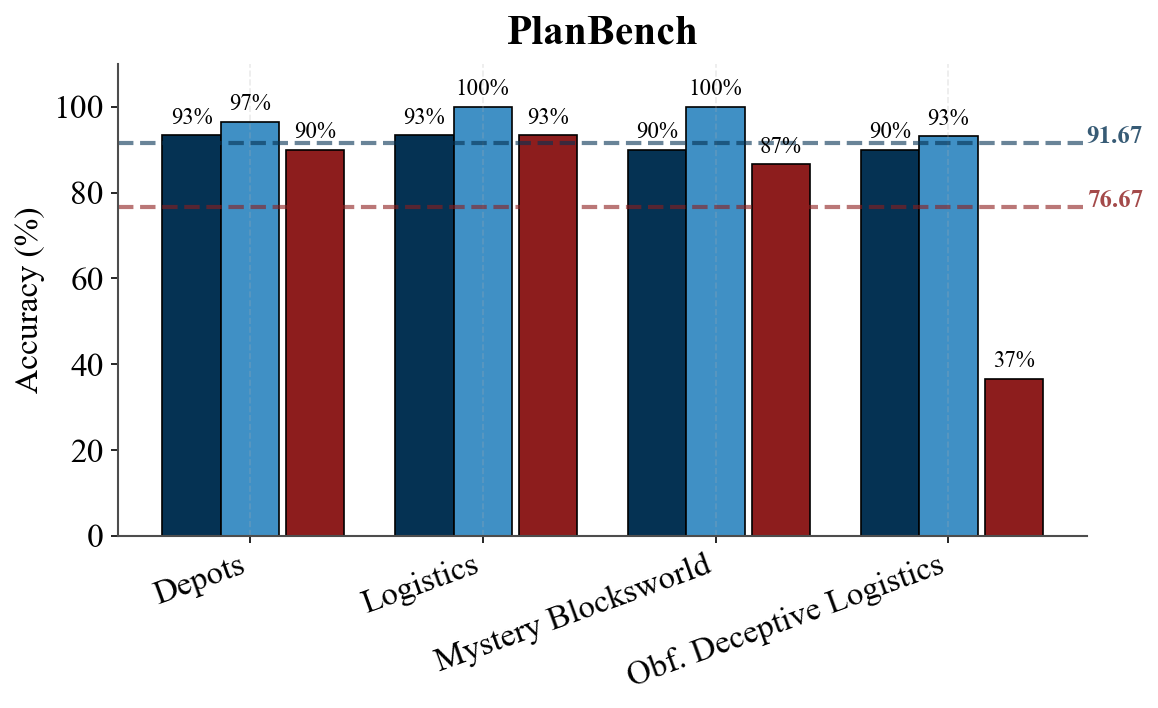

In [4]:
# ============================
# 2️⃣ PlanBench Benchmark
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["depots", "logistics", "mystery_blocksworld", "obfuscated_deceptive_logistics"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)
    
tasks_planbench = ["Depots", "Logistics", "Mystery Blocksworld", "Obf. Deceptive Logistics"]
x2 = np.arange(len(tasks_planbench))
width2 = 0.25

fig2, ax2 = plt.subplots()

bars1 = ax2.bar(x2 - width2, ours_abs, width2, label="Accuracy (ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax2.bar(x2, ours_exec, width2, label="Verified Accuracy (ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax2.bar(x2 + width2 + 0.03, vanilla_acc, width2, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax2.set_ylabel("Accuracy (%)", fontsize=16)
ax2.set_title("PlanBench", fontsize=20, pad=10)
ax2.set_xticks(x2)
ax2.set_xticklabels(tasks_planbench, rotation=20, ha="right")
# ax2.legend(fontsize=11, loc="upper left")
ax2.grid(axis="y")
ax2.set_ylim(0, 110)

# Value labels
for container in [bars1, bars2, bars3]:
    ax2.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_abs, vanilla_acc], axis=1),
                [ours_abs_color, baseline_color]):
    ax2.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax2.text(
        x=ax2.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )
    
plt.tight_layout()
plt.show()

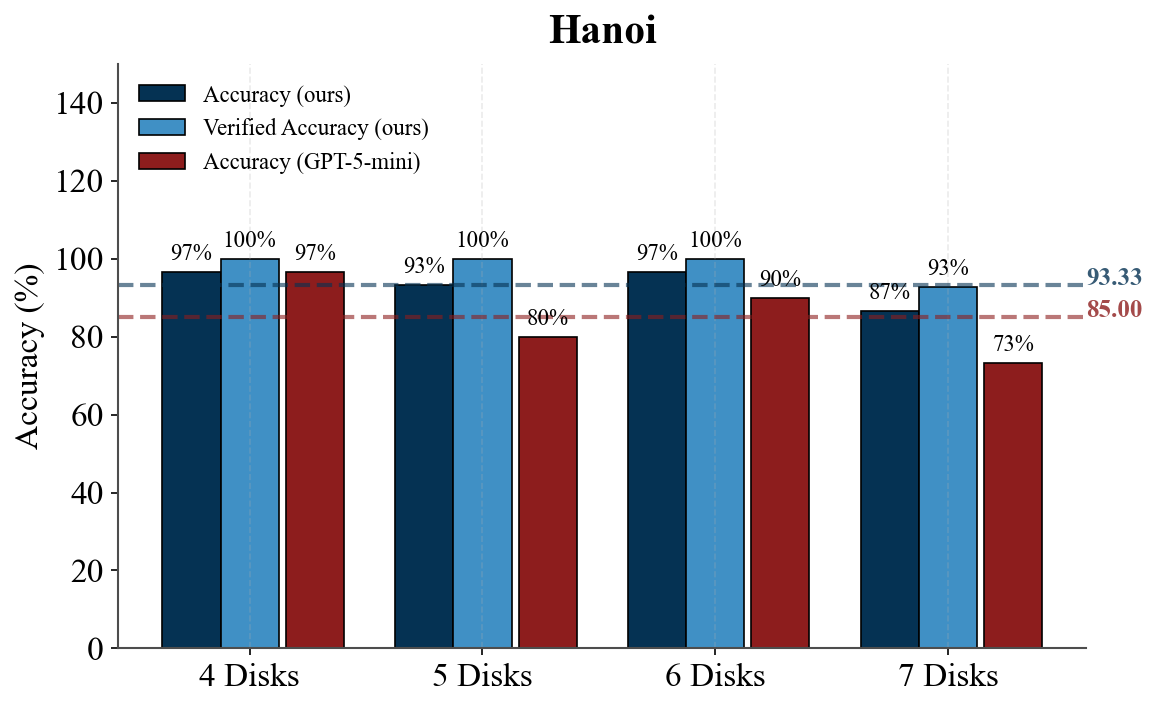

In [5]:
# ============================
# 3 Hanoi -- easy, medium, hard, extreme --
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["hanoi_easy_optimal", "hanoi_medium_optimal", "hanoi_hard_optimal", "hanoi_extreme_optimal"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)
    
tasks_planbench = ["4 Disks", "5 Disks", "6 Disks", "7 Disks"]
x2 = np.arange(len(tasks_planbench))
width2 = 0.25

fig2, ax2 = plt.subplots()

bars1 = ax2.bar(x2 - width2, ours_abs, width2, label="Accuracy (ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax2.bar(x2, ours_exec, width2, label="Verified Accuracy (ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax2.bar(x2 + width2 + 0.03, vanilla_acc, width2, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax2.set_ylabel("Accuracy (%)", fontsize=16)
ax2.set_title("Hanoi", fontsize=20, pad=10)
ax2.set_xticks(x2)
ax2.set_xticklabels(tasks_planbench, rotation=0, ha="center")
ax2.legend(fontsize=11, loc="upper left")
ax2.grid(axis="y")
ax2.set_ylim(0, 150)

# Value labels
for container in [bars1, bars2, bars3]:
    ax2.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_abs, vanilla_acc], axis=1),
                [ours_abs_color, baseline_color]):
    ax2.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax2.text(
        x=ax2.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )
    
plt.tight_layout()
plt.show()

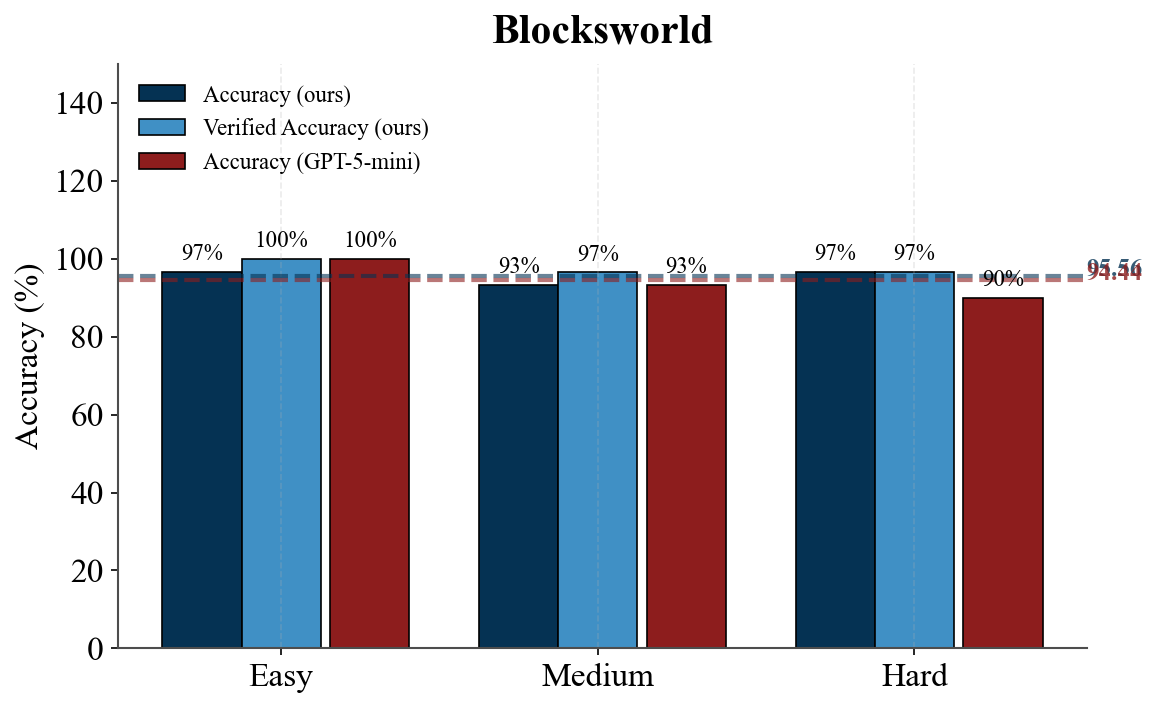

In [6]:
# ============================
# 4 Blocksworkd -- easy, medium, hard --
# ============================
with open(f"./results/{model}/_accuracies/accuracy_pddl.json", "r") as f:
    data_pddl = json.load(f)
with open(f"./results/{model}/_accuracies/accuracy_vanilla.json", "r") as f:
    data_vanilla = json.load(f)
    
data_pddl = {d["dataset"]: {"accuracy": d["accuracy"], 
                            "accuracy_plan_paths_existing": d["accuracy_plan_paths_existing"]} 
             for d in data_pddl}
data_vanilla = {d["dataset"]: {"accuracy": d["accuracy"]}
                    for d in data_vanilla}

results_json_names = ["blocksworld_easy_optimal", "blocksworld_medium_optimal", "blocksworld_hard_optimal"]
ours_abs, ours_exec, vanilla_acc  = [], [], []
for d_name in results_json_names:
    ours_abs.append(data_pddl[d_name]["accuracy"] * 100)
    ours_exec.append(data_pddl[d_name]["accuracy_plan_paths_existing"] * 100)
    vanilla_acc.append(data_vanilla[d_name]["accuracy"] * 100)

tasks_planbench = ["Easy", "Medium", "Hard"]
x2 = np.arange(len(tasks_planbench))
width2 = 0.25

fig2, ax2 = plt.subplots()

bars1 = ax2.bar(x2 - width2, ours_abs, width2, label="Accuracy (ours)",
                color=ours_abs_color, edgecolor=edge_color, linewidth=0.8)
bars2 = ax2.bar(x2, ours_exec, width2, label="Verified Accuracy (ours)",
                color=ours_exec_color, edgecolor=edge_color, linewidth=0.8)
bars3 = ax2.bar(x2 + width2 + 0.03, vanilla_acc, width2, label="Accuracy (GPT-5-mini)",
                color=baseline_color, edgecolor=edge_color, linewidth=0.8)

ax2.set_ylabel("Accuracy (%)", fontsize=16)
ax2.set_title("Blocksworld", fontsize=20, pad=10)
ax2.set_xticks(x2)
ax2.set_xticklabels(tasks_planbench, rotation=0, ha="center")
ax2.legend(fontsize=11, loc="upper left")
ax2.grid(axis="y")
ax2.set_ylim(0, 150)

# Value labels
for container in [bars1, bars2, bars3]:
    ax2.bar_label(container, fmt="%.0f%%", padding=3, fontsize=11, color="black")

# Average lines
for y, c in zip(np.mean([ours_abs, vanilla_acc], axis=1),
                [ours_abs_color, baseline_color]):
    ax2.axhline(y, color=c, linestyle='--', linewidth=2, alpha=0.6)
    
    # Add value label on the line
    ax2.text(
        x=ax2.get_xlim()[1],       # place at right edge of plot
        y=y,                       # at the same height as the line
        s=f'{y:.2f}',              # format value
        color=c,                   # match line color
        fontsize=12, fontweight='bold',
        alpha=0.8
    )
    
plt.tight_layout()
plt.show()

In [7]:
# Analysis of the agents employed
import os
import re

model = "gpt-5"
folder_path = f"./results/{model}/consolidated_results/"
pattern = r'"history"\s*:\s*\[(.*?)\]'

tasks = {
    "calendar_scheduling": "google/calendar_scheduling/FastDownwards",
    "meeting_planning": "google/meeting_planning/FastDownwards",
    "trip_planning": "google/trip_planning/FastDownwards",
    "depots": "planbench/depots/FastDownwards",
    "logistics": "planbench/logistics/FastDownwards",
    "mystery_blocksworld": "planbench/mystery_blocksworld/FastDownwards",
    "obfuscated_deceptive_logistics": "planbench/obfuscated_deceptive_logistics/FastDownwards",
    "hanoi_easy_optimal": "hanoi/hanoi_easy/hanoi_easy/FastDownwards",
    "hanoi_medium_optimal": "hanoi/hanoi_medium/hanoi_medium/FastDownwards",
    "hanoi_hard_optimal": "hanoi/hanoi_hard/hanoi_hard/FastDownwards",
    "hanoi_extreme_optimal": "hanoi/hanoi_extreme/hanoi_extreme/FastDownwards",
    "blocksworld_easy_optimal": "blocksworld/blocksworld_easy/blocksworld_easy/FastDownwards",
    "blocksworld_medium_optimal": "blocksworld/blocksworld_medium/blocksworld_medium/FastDownwards",
    "blocksworld_hard_optimal": "blocksworld/blocksworld_hard/blocksworld_hard/FastDownwards"
}

tasks = {k: folder_path + v for k, v in tasks.items()}

agent_counts = {t: {}  for t in tasks.keys()}
for task_name, task_folder in tasks.items():
    print(task_folder)
    for filename in os.listdir(task_folder):
        subfolders = [
                        f for f in os.listdir(task_folder)
                        if os.path.isdir(os.path.join(task_folder, f))
                    ]
        for subfolder in subfolders:
            subfolder_path = os.path.join(task_folder, subfolder)
            for filename in os.listdir(subfolder_path):
                if filename.endswith("_logs.txt"):
                    logs = os.path.join(subfolder_path, filename)
                    with open(logs, "r") as f:
                        content = f.read()
                        idx = content.rfind('"history": [')
                        if idx != -1:
                            idx += len('"history": [\n')
                            end = content.rfind('],\n    "proposed_solution":')
                            if end > idx:
                                agents = content[idx:end].strip()
                                agents = [x.strip().strip(',').strip('"') for x in agents.splitlines() if x.strip()]
                                for agent in agents:
                                    agent_counts[task_name][agent] = agent_counts[task_name].get(agent, 0) + 1
        

./results/gpt-5/consolidated_results/google/calendar_scheduling/FastDownwards
./results/gpt-5/consolidated_results/google/meeting_planning/FastDownwards
./results/gpt-5/consolidated_results/google/trip_planning/FastDownwards
./results/gpt-5/consolidated_results/planbench/depots/FastDownwards
./results/gpt-5/consolidated_results/planbench/logistics/FastDownwards
./results/gpt-5/consolidated_results/planbench/mystery_blocksworld/FastDownwards
./results/gpt-5/consolidated_results/planbench/obfuscated_deceptive_logistics/FastDownwards
./results/gpt-5/consolidated_results/hanoi/hanoi_easy/hanoi_easy/FastDownwards


FileNotFoundError: [Errno 2] No such file or directory: './results/gpt-5/consolidated_results/hanoi/hanoi_easy/hanoi_easy/FastDownwards'

In [ ]:
agent_counts

{'calendar_scheduling': {'AgentSolutionFirst': 930,
  'AgentSyntaxPDDL': 682,
  'AgentDeepThinkPDDL': 248,
  'AgentFastDownwardsAdapter': 31,
  'AgentTemporalConsistency': 341,
  'AgentDeepThinkConstraints': 31},
 'meeting_planning': {'AgentSolutionFirst': 930,
  'AgentSyntaxPDDL': 961,
  'AgentFastDownwardsAdapter': 279,
  'AgentTemporalConsistency': 775,
  'AgentDeepThinkPDDL': 155},
 'trip_planning': {'AgentSolutionFirst': 899,
  'AgentTemporalConsistency': 558,
  'AgentSyntaxPDDL': 310,
  'AgentFastDownwardsAdapter': 124,
  'AgentDeepThinkConstraints': 31,
  'AgentDeepThinkPDDL': 31},
 'depots': {'AgentSolutionFirst': 930,
  'AgentDeepThinkPDDL': 1674,
  'AgentFastDownwardsAdapter': 589,
  'AgentDeepThinkConstraints': 837,
  'AgentSyntaxPDDL': 186,
  'AgentNaturalLanguage': 62},
 'logistics': {'AgentSolutionFirst': 899,
  'AgentFastDownwardsAdapter': 775,
  'AgentDeepThinkPDDL': 2294,
  'AgentSyntaxPDDL': 155,
  'AgentDeepThinkConstraints': 620,
  'AgentNaturalLanguage': 62},
 'mys

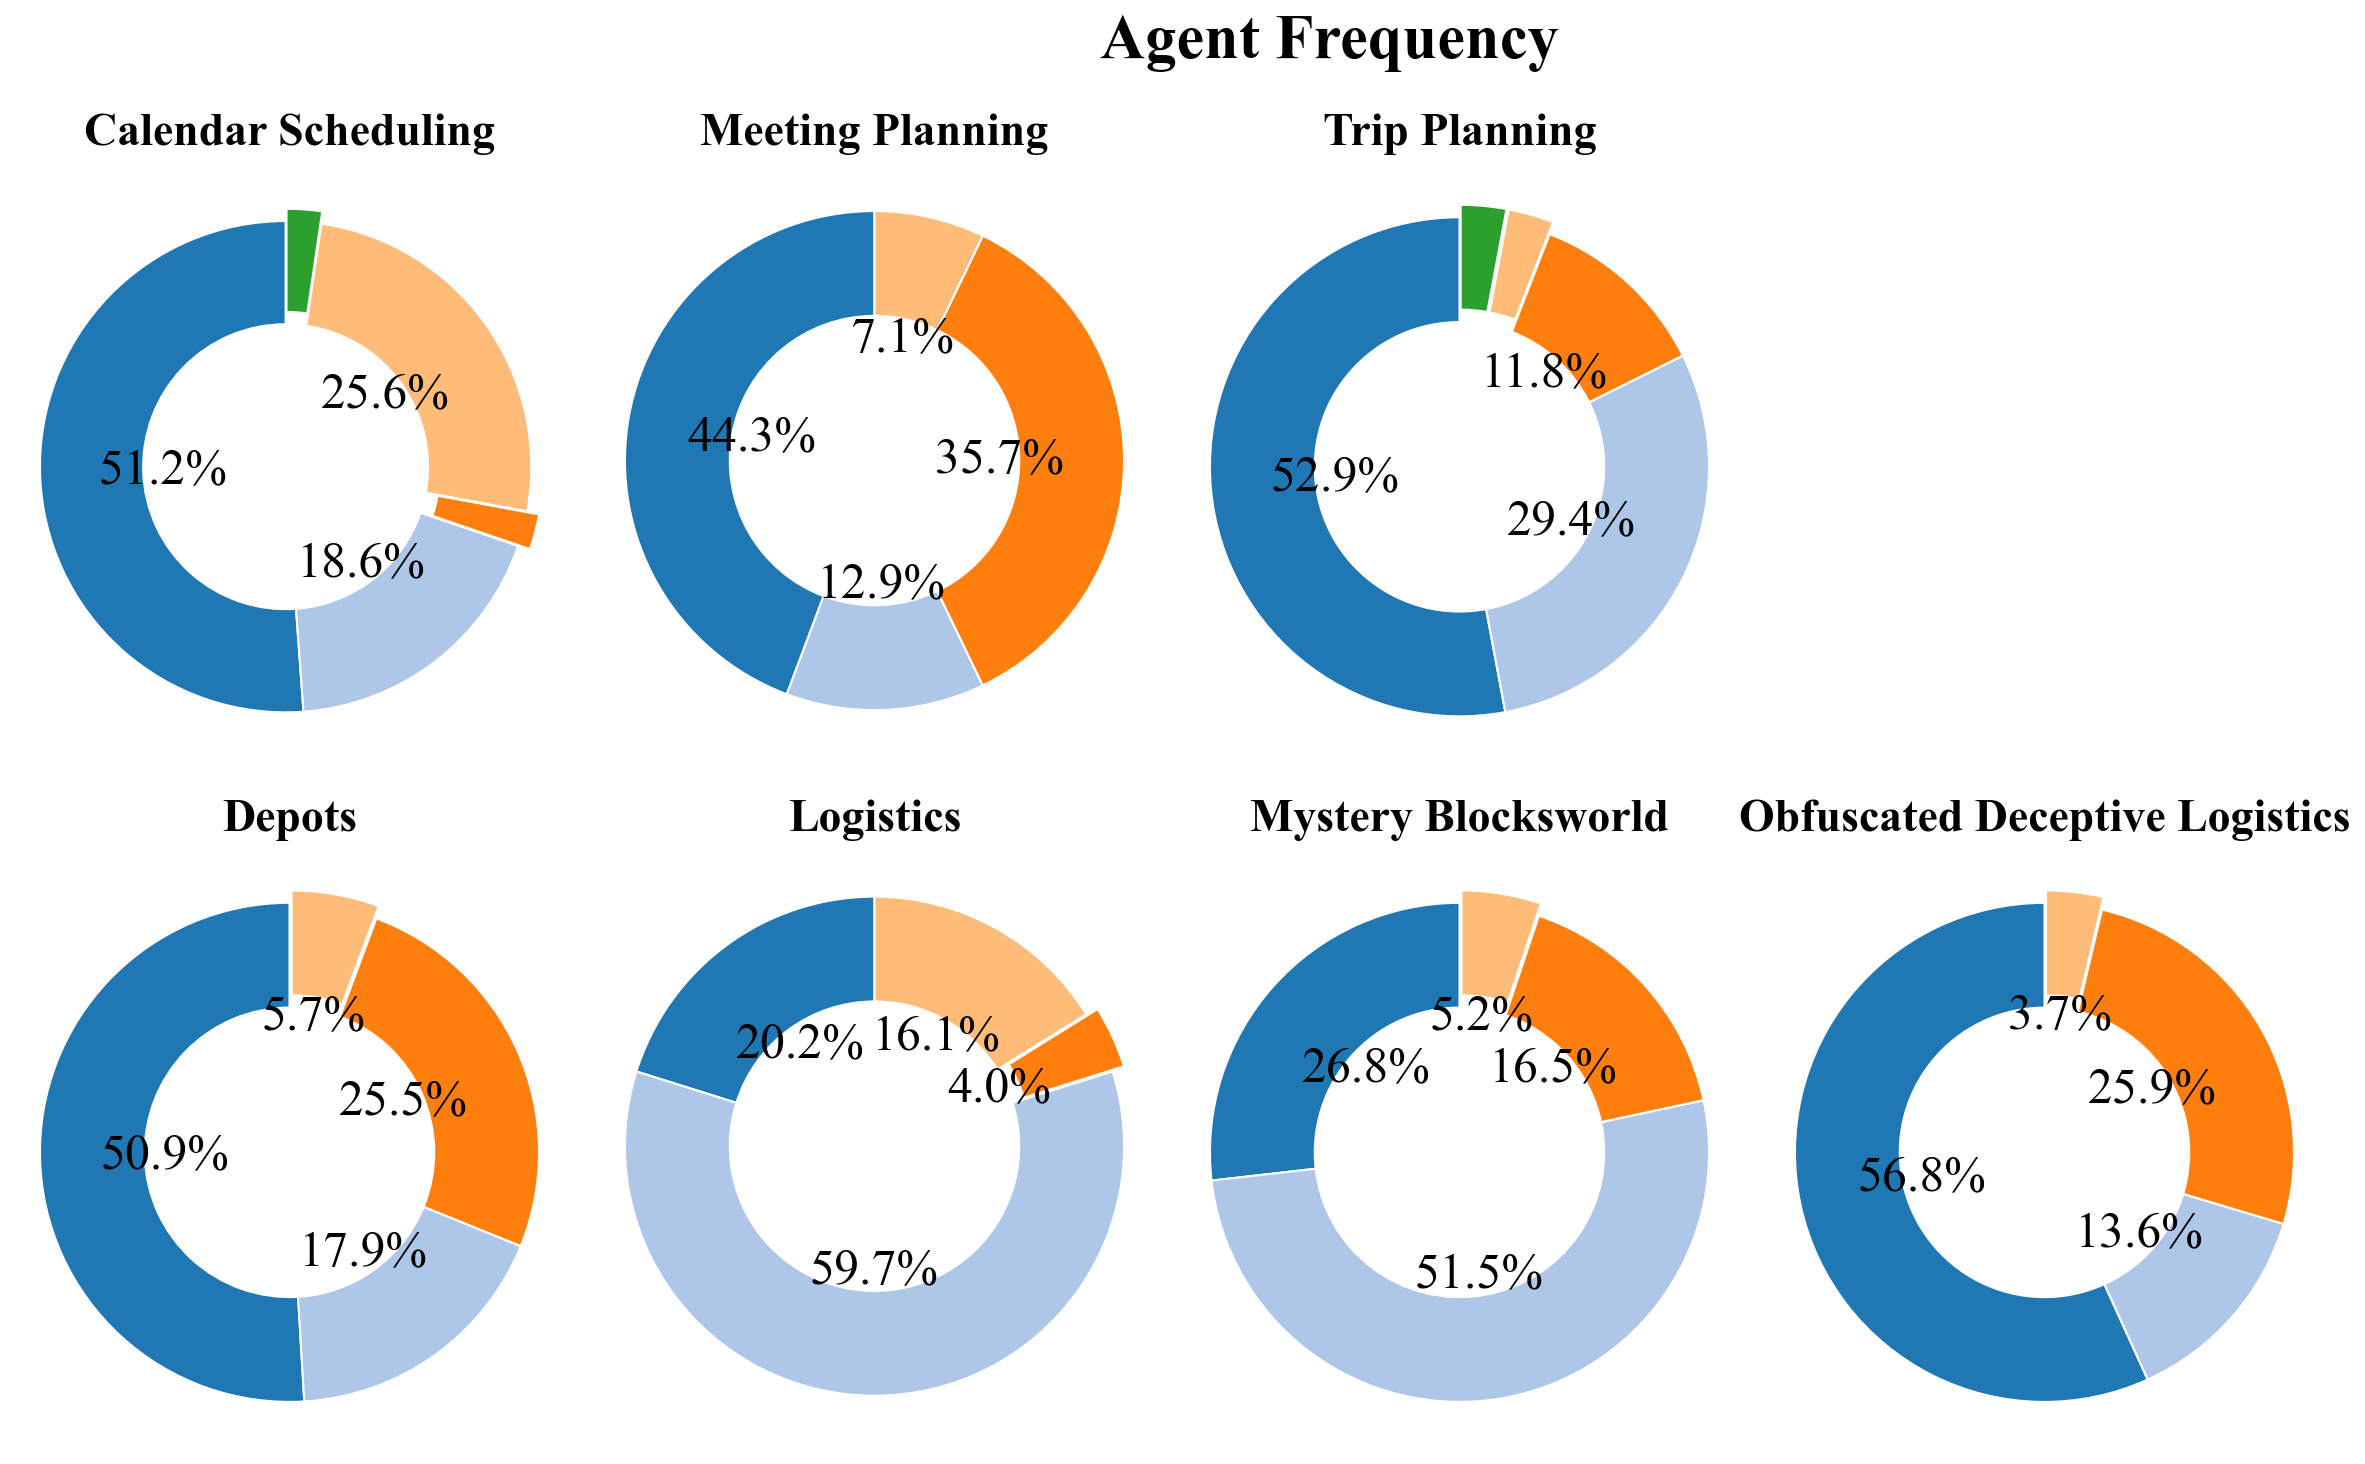

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np

# Data
data = {
 'Calendar Scheduling': {
  'AgentSyntaxPDDL': 682,
  'AgentDeepThinkPDDL': 248,
  'AgentFastDownwardsAdapter': 31,
  'AgentTemporalConsistency': 341,
  'AgentDeepThinkConstraints': 31},
 'Meeting Planning': {
  'AgentSyntaxPDDL': 961,
  'AgentFastDownwardsAdapter': 279,
  'AgentTemporalConsistency': 775,
  'AgentDeepThinkPDDL': 155},
 'Trip Planning': {
  'AgentTemporalConsistency': 558,
  'AgentSyntaxPDDL': 310,
  'AgentFastDownwardsAdapter': 124,
  'AgentDeepThinkConstraints': 31,
  'AgentDeepThinkPDDL': 31},
 'Depots': {
  'AgentDeepThinkPDDL': 1674,
  'AgentFastDownwardsAdapter': 589,
  'AgentDeepThinkConstraints': 837,
  'AgentSyntaxPDDL': 186},
 'Logistics': {
  'AgentFastDownwardsAdapter': 775,
  'AgentDeepThinkPDDL': 2294,
  'AgentSyntaxPDDL': 155,
  'AgentDeepThinkConstraints': 620},
 'Mystery Blocksworld': {
  'AgentFastDownwardsAdapter': 806,
  'AgentDeepThinkPDDL': 1550,
  'AgentDeepThinkConstraints': 496,
  'AgentSyntaxPDDL': 155},
 'Obfuscated Deceptive Logistics': {
  'AgentDeepThinkPDDL': 1426,
  'AgentFastDownwardsAdapter': 341,
  'AgentDeepThinkConstraints': 651,
  'AgentSyntaxPDDL': 93}
}

# Prepare a color palette
cmap = plt.get_cmap("tab20")
palette = [cmap(i) for i in range(cmap.N)]

# --- Combined figure: 3 on top, 4 at the bottom ---
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 4, height_ratios=[1, 1])

dataset_names = list(data.keys())

# Create axes for pies
axes = []
for i in range(3):
    axes.append(fig.add_subplot(gs[0, i]))
for i in range(4):
    axes.append(fig.add_subplot(gs[1, i]))

# Build global legend entries
global_labels = []
global_colors = []

# Plot dataset donuts
for ax, dataset_name in zip(axes, dataset_names):
    counts = data[dataset_name]
    labels = list(counts.keys())
    sizes = np.array(list(counts.values()), dtype=float)
    total = sizes.sum()

    colors = [palette[i % len(palette)] for i in range(len(labels))]

    # Add to global legend (unique agents)
    for label, color in zip(labels, colors):
        if label not in global_labels:
            global_labels.append(label)
            global_colors.append(color)

    explode = [0.05 if (s / total) < 0.06 else 0 for s in sizes]

    ax.pie(
        sizes,
        labels=None,
        autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "",
        pctdistance=1.0,
        startangle=90,
        colors=colors,
        wedgeprops={'width': 0.42, 'edgecolor': 'white'},
        explode=explode,
        textprops={'fontsize': 24}
    )

    ax.set_title(f"{dataset_name}", fontsize=22, weight='bold')
    ax.axis('equal')

fig.suptitle("Agent Frequency", fontsize=30, weight='semibold')

# # Add one large shared legend on the right side
# fig.legend(
#     global_labels,
#     title="Agents",
#     loc='upper right',
#     bbox_to_anchor=(1.12, 0.5),
#     fontsize=20,
#     title_fontsize=30,
#     facecolor='white'
# )

plt.tight_layout(rect=[0, 0, 0.88, 1])  # adjust to leave space for legend
plt.show()


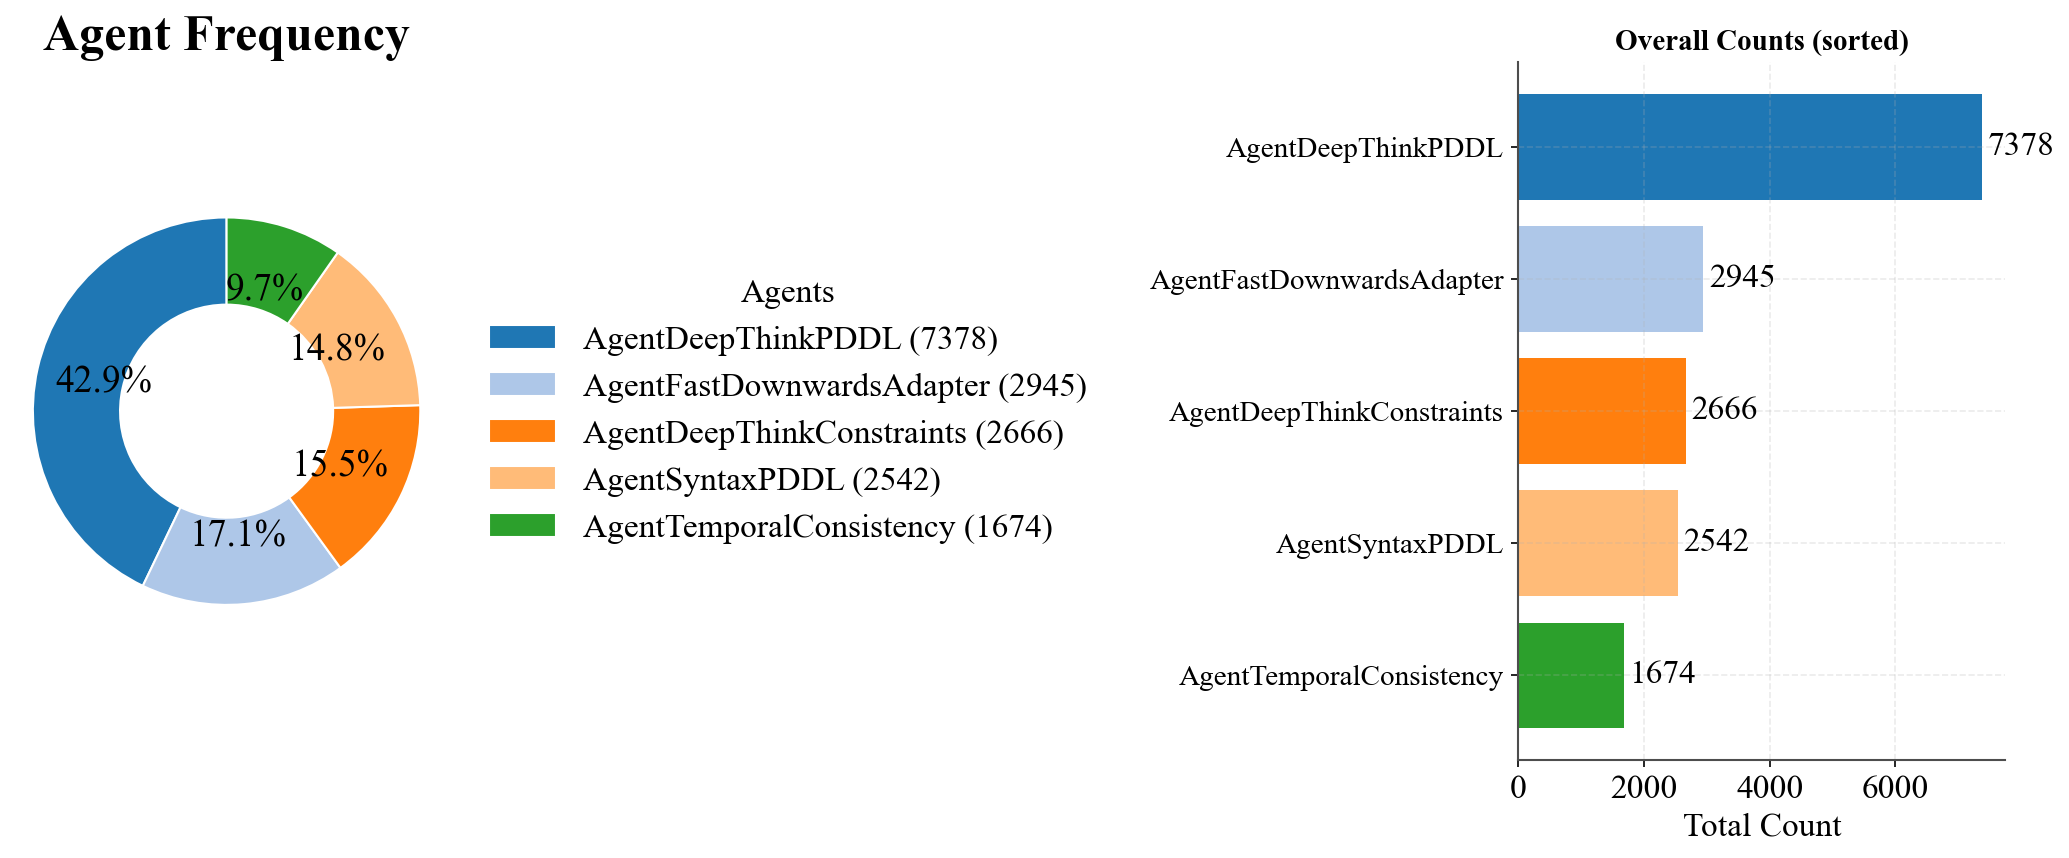

In [ ]:
# --- Overall analysis ---
overall = Counter()
for counts in data.values():
    overall.update(counts)

overall_items = overall.most_common()
agents, totals = zip(*overall_items)
totals = np.array(totals, dtype=float)
overall_total = totals.sum()
colors = [palette[i % len(palette)] for i in range(len(agents))]

# Overall figure
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1.15]})

# Donut
ax1.pie(
    totals,
    labels=None,
    autopct=lambda pct: f"{pct:.1f}%" if pct >= 3 else "",
    pctdistance=0.65,
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.45, 'edgecolor': 'white'},
    textprops={'fontsize': 18}
)
ax1.set_title(f"Agent Frequency", fontsize=24, weight='bold')
ax1.axis('equal')
ax1.legend([f"{a} ({int(t)})" for a, t in zip(agents, totals)], title="Agents", loc="center left", bbox_to_anchor=(1.05, 0.5))

# Bar chart
y_pos = np.arange(len(agents))
ax2.barh(y_pos, totals, color=colors)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(agents, fontsize=14)
ax2.invert_yaxis()
ax2.set_xlabel("Total Count")
ax2.set_title("Overall Counts (sorted)", fontsize=14, weight='bold')

for i, v in enumerate(totals):
    ax2.text(v + overall_total * 0.005, i, str(int(v)), va='center')

plt.tight_layout()
plt.show()